<h2>Unsupervised Learning</h2>

<h4>Getting the dataset ready

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd 
import random
import seaborn as sns #seaborn is used for data visualization it is alternate of matplotlib

students = [chr(i+64) for i in range(1,100)]
math_marks= [random.randrange(1,100) for i in range(len(students))]
science_marks= [random.randrange(1,100) for i in range(len(students))]

print(len(students), len(math_marks), len(science_marks))
data_frame = pd.DataFrame({
    'Names' : students,
    'Maths' : math_marks,
    'Science' : science_marks
})

display(data_frame)

99 99 99


,Names,Maths,Science
0,A,80,93
1,B,3,33
2,C,36,73
3,D,68,32
4,E,19,1
...,...,...,...
94,,99,45
95,,51,75
96,¡,82,19
97,¢,85,73


<h4>Data Visualization</h4>

Text(0, 0.5, 'Science')

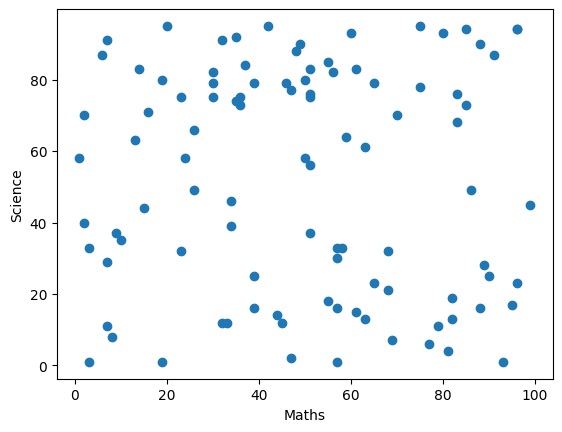

In [4]:
plt.scatter(data_frame['Maths'], data_frame['Science'])
plt.xlabel('Maths')
plt.ylabel('Science')

<h3>K-Means Clustering</h3>

In [10]:
kmeans = KMeans(n_clusters=4, random_state=42)

#Fit the model
kmeans.fit(data_frame[['Maths', 'Science']])

#Add the cluster labels to the Dataframe
data_frame['Cluster'] = kmeans.labels_

display(data_frame)

,Names,Maths,Science,Cluster
0,A,80,93,0
1,B,3,33,1
2,C,36,73,3
3,D,68,32,2
4,E,19,1,1
...,...,...,...,...
94,,99,45,2
95,,51,75,0
96,¡,82,19,2
97,¢,85,73,0


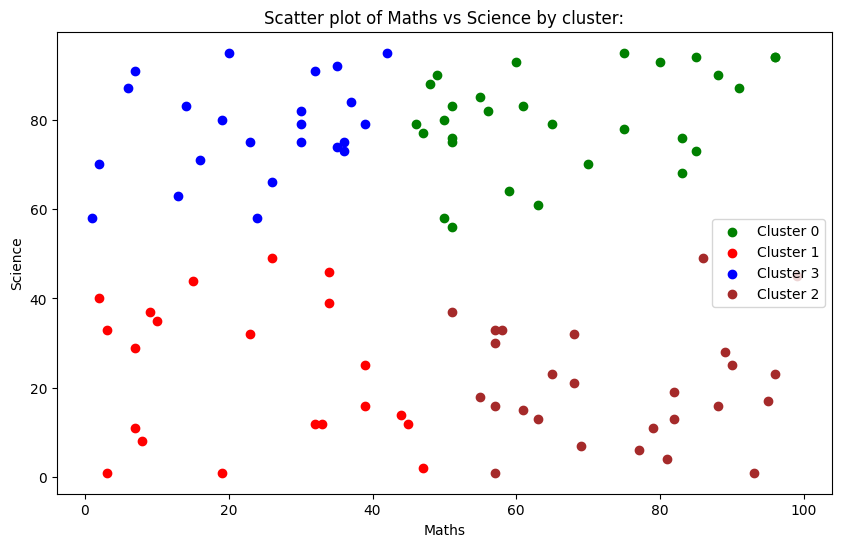

In [12]:
#Define colors for each cluster
colors = {0 : 'green', 1 : 'red', 2 : 'brown', 3 : 'blue'}

#Create scatter plot
plt.figure(figsize=(10, 6))
for cluster in data_frame['Cluster'].unique():
    subset = data_frame[data_frame['Cluster'] == cluster]
    plt.scatter(subset['Maths'], subset['Science'], color = colors[cluster], label = f'Cluster {cluster}')

#Add labels and title
plt.xlabel('Maths')
plt.ylabel('Science')
plt.title('Scatter plot of Maths vs Science by cluster:')
plt.legend()
plt.show()